In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [6]:
DOH_inspect = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results (1).csv')
print(DOH_inspect.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245435 entries, 0 to 245434
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CAMIS                   245435 non-null  int64  
 1   DBA                     243824 non-null  object 
 2   BORO                    245435 non-null  object 
 3   BUILDING                244932 non-null  object 
 4   STREET                  245405 non-null  object 
 5   ZIPCODE                 241960 non-null  float64
 6   PHONE                   245413 non-null  object 
 7   CUISINE DESCRIPTION     241275 non-null  object 
 8   INSPECTION DATE         245435 non-null  object 
 9   ACTION                  241275 non-null  object 
 10  VIOLATION CODE          239519 non-null  object 
 11  VIOLATION DESCRIPTION   239519 non-null  object 
 12  CRITICAL FLAG           245435 non-null  object 
 13  SCORE                   233600 non-null  float64
 14  GRADE               

In [193]:
New_DOH_inspect =DOH_inspect.drop(DOH_inspect[(DOH_inspect['BORO']=='0')].index,inplace=True)


In [96]:
count_of_inspect_per_boro = DOH_inspect["BORO"].value_counts()
print(count_of_inspect_per_boro)


Manhattan        92237
Brooklyn         63082
Queens           58237
Bronx            23529
Staten Island     8271
Name: BORO, dtype: int64


In [165]:
percent_inspections_per_boro = DOH_inspect["BORO"].value_counts(normalize=True)
print(percent_inspections_per_boro)


Manhattan        0.375931
Brooklyn         0.257104
Queens           0.237357
Bronx            0.095897
Staten Island    0.033710
Name: BORO, dtype: float64


In [174]:
DOH_inspect["address"] = DOH_inspect['BUILDING'].astype(str) +" "+ DOH_inspect["STREET"]
print(DOH_inspect)


           CAMIS                           DBA       BORO BUILDING  \
0       50123204             BUBBLE TEA GARDEN     Queens    15903   
1       50116374      DELIGHTFUL BAKERY & CAFE     Queens     7020   
2       50127523                         VIRGO  Manhattan      324   
3       50121809                           NaN     Queens    12420   
4       50106060                           NaN     Queens     1693   
...          ...                           ...        ...      ...   
245430  50065122  PEKING HOUSE RESTAURANT INC.     Queens     9617   
245431  41532740          EXQUISITE RESTAURANT   Brooklyn     2905   
245432  50072912             YES CHEF WINE BAR     Queens     4410   
245433  50073537                         MAMAN  Manhattan       22   
245434  50079488  JOE & THE JUICE GREENWICH ST  Manhattan      295   

                  STREET  ZIPCODE       PHONE CUISINE DESCRIPTION  \
0           HILLSIDE AVE  11432.0  9292338584                 NaN   
1              GRAND 

In [190]:
count_of_rest=DOH_inspect.CAMIS.nunique()
print(count_of_rest)


27893


In [189]:

count_of_rest_per_boro=DOH_inspect.groupby('BORO').CAMIS.nunique()
print(count_of_rest_per_boro)

BORO
Bronx             2542
Brooklyn          7084
Manhattan        10762
Queens            6465
Staten Island     1040
Name: CAMIS, dtype: int64


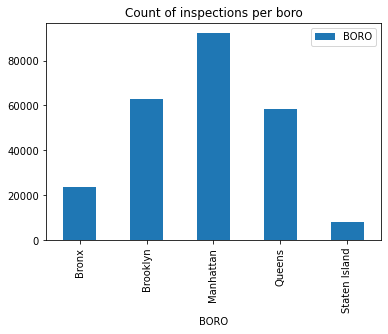

In [197]:
count_of_inspect_per_boro = DOH_inspect.groupby("BORO").agg({'BORO':'count'})
count_of_inspect_per_boro.plot(kind='bar', title= 'Count of inspections per boro')
plt.show()


In [98]:
count_all_violations = DOH_inspect['VIOLATION CODE'].notnull().sum()
print(count_all_violations)


239479


In [99]:
most_common_vilation = DOH_inspect['VIOLATION CODE'].value_counts()
print(most_common_vilation)


10F      41953
08A      25717
04L      16264
06D      16005
02G      14727
         ...  
22B          1
15-39        1
20C          1
15-33        1
03F          1
Name: VIOLATION CODE, Length: 136, dtype: int64


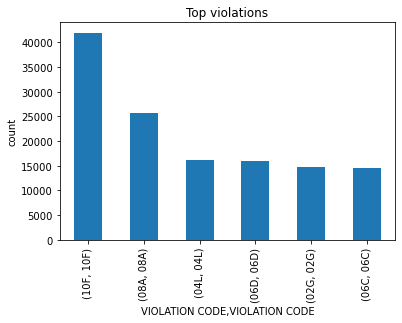

In [203]:
most_common_vilation = DOH_inspect.groupby(["VIOLATION CODE"])['VIOLATION CODE'].value_counts().sort_values(ascending=False).head(6)
most_common_vilation.plot(kind='bar',title="Top violations", ylabel='count')
plt.show()

In [100]:
most_common_vilation_per_boro = DOH_inspect.groupby(["BORO"])['VIOLATION CODE'].value_counts().sort_values(ascending=False)

print(most_common_vilation_per_boro)

BORO           VIOLATION CODE
Manhattan      10F               15739
Brooklyn       10F               10944
Queens         10F                9760
Manhattan      08A                9440
               06D                6700
                                 ...  
               18-14                 1
Bronx          15S                   1
               15L                   1
               15J                   1
Staten Island  19-04                 1
Name: VIOLATION CODE, Length: 536, dtype: int64


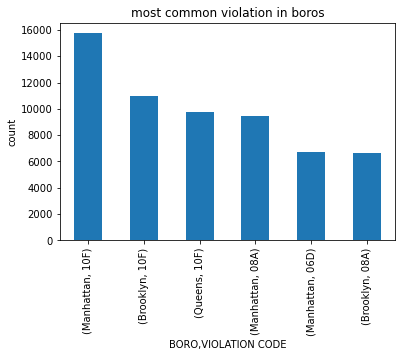

In [204]:
most_common_vilation_per_boro = DOH_inspect.groupby(["BORO"])['VIOLATION CODE'].value_counts().sort_values(ascending=False).head(6)
most_common_vilation_per_boro.plot(kind='bar', title='most common violation in boros', ylabel='count')
plt.show()

In [101]:
DOH_inspect['INSPECTION DATE'] = pd.to_datetime(DOH_inspect['INSPECTION DATE'])

DOH_inspect['year'] = DOH_inspect['INSPECTION DATE'].dt.year
print(DOH_inspect.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 245356 entries, 0 to 245434
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CAMIS                   245356 non-null  int64         
 1   DBA                     243773 non-null  object        
 2   BORO                    245356 non-null  object        
 3   BUILDING                244883 non-null  object        
 4   STREET                  245356 non-null  object        
 5   ZIPCODE                 241911 non-null  float64       
 6   PHONE                   245334 non-null  object        
 7   CUISINE DESCRIPTION     241234 non-null  object        
 8   INSPECTION DATE         245356 non-null  datetime64[ns]
 9   ACTION                  241234 non-null  object        
 10  VIOLATION CODE          239479 non-null  object        
 11  VIOLATION DESCRIPTION   239479 non-null  object        
 12  CRITICAL FLAG           245356

In [102]:
DOH_inspect.year = DOH_inspect['INSPECTION DATE'].dt.year
DOH_inspect.year.value_counts()


2019    87236
2022    73949
2021    25601
2020    24799
2018    18527
2017     9200
2000     4122
2016     1871
2015       45
2014        5
2013        1
Name: year, dtype: int64

In [103]:
critical_violation = DOH_inspect['CRITICAL FLAG'].value_counts()
print(critical_violation)


Critical          124193
Not Critical      115286
Not Applicable      5877
Name: CRITICAL FLAG, dtype: int64


In [104]:
boro_critical_violations = DOH_inspect.groupby(["BORO"])['CRITICAL FLAG'].value_counts().sort_values(ascending=False)
print(boro_critical_violations)


BORO           CRITICAL FLAG 
Manhattan      Critical          46474
               Not Critical      43428
Brooklyn       Critical          31797
               Not Critical      29802
Queens         Critical          29676
               Not Critical      27177
Bronx          Critical          12049
               Not Critical      10987
Staten Island  Critical           4197
               Not Critical       3892
Manhattan      Not Applicable     2335
Brooklyn       Not Applicable     1483
Queens         Not Applicable     1384
Bronx          Not Applicable      493
Staten Island  Not Applicable      182
Name: CRITICAL FLAG, dtype: int64


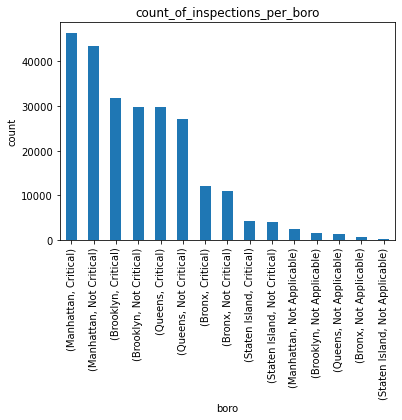

In [105]:
df1= DOH_inspect.groupby(['BORO'])['CRITICAL FLAG'].value_counts().sort_values(ascending=False)
df1.plot (kind = "bar", title= 'count_of_critical_flags',ylabel= "count", xlabel ="boro")
plt.show()


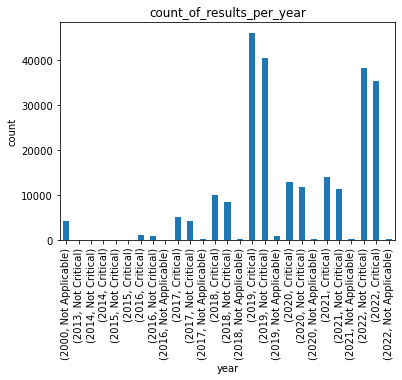

In [140]:
df2= DOH_inspect.groupby(['year'])['CRITICAL FLAG'].value_counts()
df2.plot (kind = "bar", title= 'count_of_results_per_year',ylabel= "count", xlabel ="year")
plt.show()


<AxesSubplot:xlabel='year', ylabel='count'>

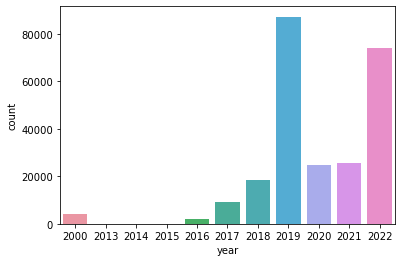

In [159]:

sns.countplot(x=DOH_inspect['year'])


In [160]:
critical_violation = DOH_inspect['CRITICAL FLAG'].value_counts(normalize=True)
print(critical_violation)


Critical          0.506175
Not Critical      0.469872
Not Applicable    0.023953
Name: CRITICAL FLAG, dtype: float64


In [162]:
action_type = DOH_inspect['ACTION'].value_counts()
print(action_type)


Violations were cited in the following area(s).                                                                                       227783
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.      9217
Establishment re-opened by DOHMH.                                                                                                       2457
No violations were recorded at the time of this inspection.                                                                             1743
Establishment re-closed by DOHMH.                                                                                                         34
Name: ACTION, dtype: int64


In [182]:
name_of_rest = DOH_inspect['DBA'].value_counts()
print(name_of_rest)


DUNKIN                      2845
SUBWAY                      1718
STARBUCKS                   1220
MCDONALD'S                  1133
KENNEDY FRIED CHICKEN        755
                            ... 
MIA MARIE'S                    1
SeafoodMixer Market            1
CATRACHA RESTAURANT            1
Palace Chicken and Grill       1
DM RESTAURANT                  1
Name: DBA, Length: 21214, dtype: int64


In [184]:
avg_score_per_boro=DOH_inspect.groupby(['BORO'])['SCORE'].mean()
print(avg_score_per_boro)


BORO
Bronx            21.405453
Brooklyn         22.241548
Manhattan        21.711389
Queens           21.879903
Staten Island    18.937366
Name: SCORE, dtype: float64


In [185]:
avg_score_per_boro_and_year=DOH_inspect.groupby(['BORO','year'])['SCORE'].mean()
print(avg_score_per_boro_and_year)

BORO           year
Bronx          2000          NaN
               2015     9.000000
               2016    19.878571
               2017    17.785421
               2018    19.884438
               2019    20.863972
               2020    18.167921
               2021    21.636832
               2022    24.150092
Brooklyn       2000          NaN
               2015    29.000000
               2016    16.008902
               2017    19.497154
               2018    20.080137
               2019    20.269173
               2020    19.721790
               2021    23.105863
               2022    25.596012
Manhattan      2000          NaN
               2013     2.000000
               2014    11.000000
               2015    15.347826
               2016    18.077118
               2017    18.349127
               2018    20.124230
               2019    20.246558
               2020    19.789610
               2021    21.445361
               2022    25.058866
Queens         2000    